In [0]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as rf
from time import time
import pickle
import matplotlib.pyplot as plt

In [0]:
pickle_in = open("/content/drive/My Drive/train.pk","rb")
trainx = pickle.load(pickle_in)
pickle_in.close()
trainy = np.loadtxt('/content/drive/My Drive/train_y.txt',dtype = 'int')

pickle_in = open("/content/drive/My Drive/valid.pk","rb")
validx = pickle.load(pickle_in)
pickle_in.close()
validy = np.loadtxt('/content/drive/My Drive/valid_y.txt',dtype = 'int')

pickle_in = open("/content/drive/My Drive/test.pk","rb")
testx = pickle.load(pickle_in)
pickle_in.close()
testy = np.loadtxt('/content/drive/My Drive/test_y.txt',dtype = 'int')

In [0]:

ne = [50,150,250,350,450]
mf = [0.1,0.3,0.5,0.7,0.9]
mss = [2,4,6,8,10]

oob_score = 0
train_score = 0
validation_score = 0
test_score = 0
nval = 0
mfval = 0.0
mssval = 0
i=0
for n in ne:
    for m in mf:
        for ms in mss:
            clf = rf(n_estimators = n,oob_score = True,max_features = m,min_samples_split = ms)
            start = time()
            clf.fit(trainx,trainy)
            oob_score_temp = clf.oob_score_
            if oob_score_temp > oob_score:
                oob_score = oob_score_temp
                train_score = clf.score(trainx,trainy)
                validation_score = clf.score(validx,validy)
                test_score = clf.score(testx,testy)
                nval = n
                mfval = m
                mssval = ms
            print(oob_score,train_score,validation_score,test_score)
            print(time()-start)
            print(i)
            i+=1

print(mfval,mssval,nval)
print(train_score,oob_score,validation_score,test_score)


In [20]:
a = np.array([1/5.,2/5.,3/5.,4/5.,5/5.,6/5.,7/5.,8/5.,9/5.,10/5.],dtype = 'float')
mf = a*mfval
mss = a*mssval
mss = mss.astype('int')
ne = a*n_estimators
ne = ne.astype('int')
print(mf)
print(mss)
print(ne)

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2 ]
[ 2  4  6  8 10 12 14 16 18 20]
[ 70 140 210 280 350 420 489 560 630 700]


1
2
3
4
5
6
7
8
9
10


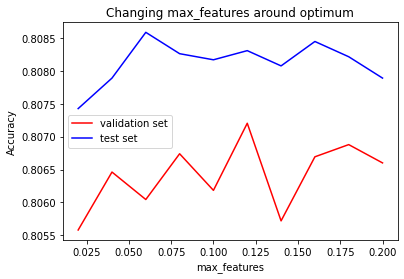

In [22]:
vacc = []
tacc = [] 
i = 0
for m in mf:
    clf = rf(n_estimators = 350,oob_score = True,max_features = m,min_samples_split = 10)
    clf.fit(trainx,trainy)
    vacc.append(clf.score(validx,validy))
    tacc.append(clf.score(testx,testy))
    i+=1
    print(i)    
plt.plot(mf,vacc,color='red', label='validation set')
plt.plot(mf,tacc, color='blue', label='test set')
plt.title('Changing max_features around optimum')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close()

In [0]:
vacc = []
tacc = [] 
i = 0
mf = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for m in mf:
    clf = rf(n_estimators = 350,oob_score = True,max_features = m,min_samples_split = 10)
    clf.fit(trainx,trainy)
    vacc.append(clf.score(validx,validy))
    tacc.append(clf.score(testx,testy))
    i+=1
    print(i)
plt.plot(mf,vacc,color='red', label='validation set')
plt.plot(mf,tacc, color='blue', label='test set')
plt.title('Changing max_features around optimum')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close()

In [0]:
vacc = []
tacc = [] 
i = 0
for ms in mss:
    clf = rf(n_estimators = 350,oob_score = True,max_features = 0.1,min_samples_split = ms)
    clf.fit(trainx,trainy)
    vacc.append(clf.score(validx,validy))
    tacc.append(clf.score(testx,testy))
    i+=1
    print(i)
plt.plot(mss,vacc,color='red', label='validation set')
plt.plot(mss,tacc, color='blue', label='test set')
plt.title('Changing min_samples_split around optimum')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close()

In [0]:
vacc = []
tacc = [] 
print(ne)
for n in ne:
    clf = rf(n_estimators = n,oob_score = True,max_features = 0.1,min_samples_split = 10)
    clf.fit(trainx,trainy)
    vacc.append(clf.score(validx,validy))
    tacc.append(clf.score(testx,testy))


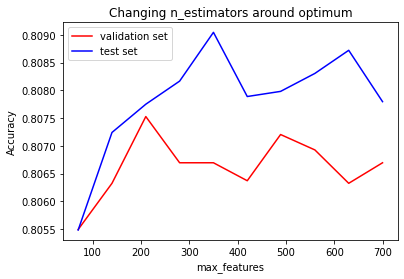

In [30]:
plt.plot(ne,vacc,color='red', label='validation set')
plt.plot(ne,tacc, color='blue', label='test set')
plt.title('Changing n_estimators around optimum')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close()